In [2]:
library("AzureML")
ws <- workspace()
dat <- download.datasets(ws, "Automobile price data (Raw)")

In [3]:
head(dat)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,â¯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
6,2,?,audi,gas,std,two,sedan,fwd,front,99.8,,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
cols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
dat[, cols] <- lapply(dat[, cols], as.numeric)
dat <- dat[complete.cases(dat), ]
str(dat)

Warning message:
In lapply(dat[, cols], as.numeric): NAs introduced by coercionWarning message:
In lapply(dat[, cols], as.numeric): NAs introduced by coercionWarning message:
In lapply(dat[, cols], as.numeric): NAs introduced by coercionWarning message:
In lapply(dat[, cols], as.numeric): NAs introduced by coercionWarning message:
In lapply(dat[, cols], as.numeric): NAs introduced by coercion

'data.frame':	195 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

In [5]:
describe <- function(df, col){
tmp <- df[, col]
sumry <- summary(tmp)
nms <- names(sumry)
nms <- c(nms, 'std')
out <- c(sumry, sd(tmp))
names(out) <- nms
out
}

In [6]:
describe(dat, 'price')

Min.  1st Qu.   Median     Mean  3rd Qu.     Max.      std 
 5118.00  7756.00 10240.00 13250.00 16510.00 45400.00  8056.33

In [7]:
install.packages('gridExtra')
plotstats <- function(df, col, bins = 30){
require(ggplot2)
require(gridExtra)
dat <- as.factor('')
## Compute bin width
bin.width <- (max(df[, col]) - min(df[, col]))/ bins
## Plot a histogram
p1 <- ggplot(df, aes_string(col)) +
geom_histogram(binwidth = bin.width)
## A simple boxplot
p2 <- ggplot(df, aes_string(dat, col)) +
geom_boxplot() + coord_flip() + ylab('')
## Now stack the plots
grid.arrange(p2, p1, nrow = 2)
}

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/tmp/RtmpDyH4fD/downloaded_packages'


Loading required package: ggplot2
Loading required package: gridExtra
Loading required package: grid


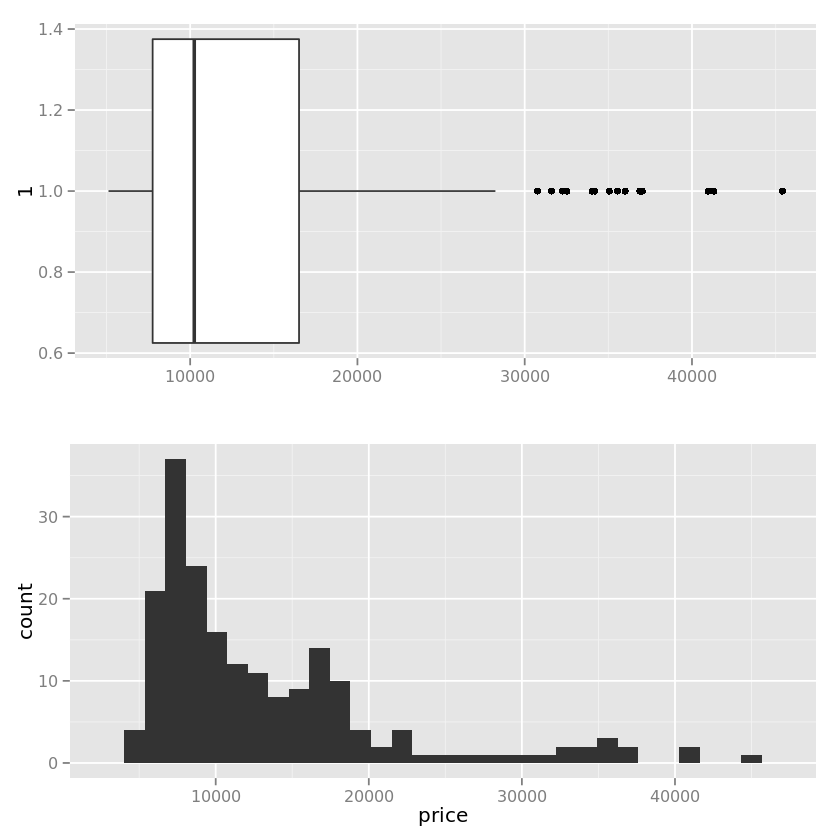

In [8]:
plotstats(dat, 'price')

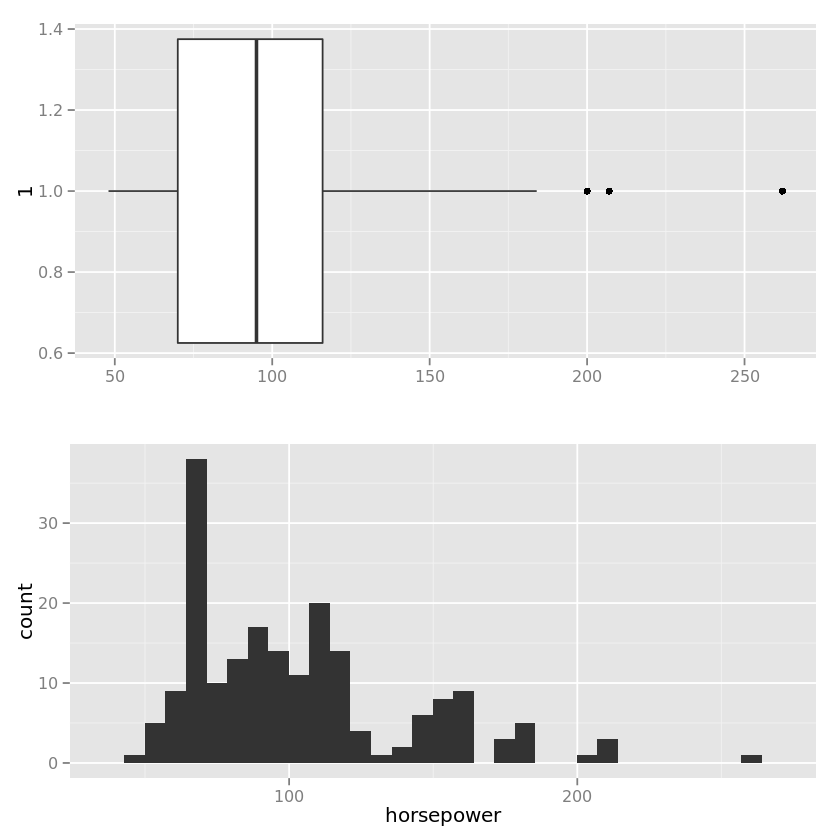

In [9]:
plotstats(dat, 'horsepower')

In [10]:
describe(dat, 'horsepower')

Min.   1st Qu.    Median      Mean   3rd Qu.      Max.       std 
 48.00000  70.00000  95.00000 103.30000 116.00000 262.00000  37.86973